## Variables
#### Buses
* bus: ($ch_n, st_n, r_{n,m}, tb_{n,m}, sb_{n,m}$)
    * $ch_n$ - charging state of bus n
    * $st_n$ - state of bus n (3 states: deployed, not-deployed, charging/refueling)
    * $r_{n,m}$ - the route on which the bus is deployed
    * $tb_{n,m}$ - the previous stop the bus travelled to (travel time)
    * $sb_{n,m}$ - the previous stop which was served by the bus (service time)
        * If $tb_n$= $sb_n$, generate travel time for $tb_{n+1}$; $tb_n$ = $tb_{n+1}$ if accepted
        * Else if $tb_n$> $sb_n$, generate service time for $sb_{n+1}$; $sb_n$ = $sb_{n+1}$ if accepted
    * Arrival time - route generated arrays
    * Service Time - route generated arrays

___
### System State New
SS = (n_buses, curr_dem, buses_deployed, buses_recharge, buses_standstill)
SS = (n_buses, curr_dem, buses_deployed, buses_recharge, buses_standstill, route_1_buses, route_2_buses,....)

#### Monitoring System State 

| Time | System State | Bus | Charge | Route | State | Event | Process Time | Demand-Current | Demand-Actual | Demand-Charge |
| ---- | ------------ | --- | ------ | ----- | ----- | ----- | ------------ | -------------- | ------------- | ------------- |
| 0    | (1,1,1,0,0)  | 1   | 50     | '1'   | 1     | 0     | 0            | 0              | 0             | 15            |
| 10.3 | (1,0,1,0,0)  | 1   | 48     | '1'   | 1     | 1     | 10.3         | -              | -             | -             |
| 12.3 | (1,0,1,0,0)  | 1   | 47.5   | '1'   | 1     | 0     | 2.0          | -              | -             | -             |

___

#### Monitoring Bus Deployments

| Time | Demand-Current | Demand-Actual | Demand-Charge | Bus | Charge | Route | Event Array  | Time Array   |
| ---- | -------------- | ------------- | ------------- | --- | ------ | ----- | ------------ | ------------ |
| 0    | 0              | 0             | 15            | 1   | 50     | '1'   | [1, 0, 1]    | [12, 35, 41] |
| 40   | 41             | 40            | 20            | 1   | 35     | '2'   | [1, 0, 1]    | [48, 50, 55] |



In [1]:
import pandas as pd
import numpy as np
import numpy.random as random
from route_functions import *
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm 

# to ignore warning on calculations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# intializing route table
routes = pd.read_excel('Model_Parameters.xlsx', 'Routes')

n_buses = 10                            # number of buses

# For liquid fuel buses
running_consumption = 0.071             # fuel(lts.)/kWh per minute
service_consumption = 0.061             # fuel(lts.)/kWh per minute
refuel_consumption = -30                # -30 for fuel, -2 for electric
tank_size = 150                         # 150 lts. / 240 kWh 
level_mean = 60                         # normal distribution.. can be changed
level_std = 0                           # currently constant at level_mean
refuel = 'refill'                       # 'refill', recharge'

'''
# For electric buses
running_consumption = _____             # fuel(lts.)/kWh per minute
service_consumption = _____             # fuel(lts.)/kWh per minute
refuel_consumption = -2                 # -30 for fuel, -2 for electric
tank_size = 240                         # 150 lts. / 240 kWh 
level_mean = 40                         # normal distribution.. can be changed
level_std = 0                           # currently constant at level_mean
refuel = 'recharge'                     # 'refill', recharge'
'''

#-----
# customizable parameters
#average_bus_speed = 30 miles /hr
refuel_stations = 2
conversion_factor = 100/tank_size

# cost rates
emp_rate = 15                           # per hour basis
fuel_rate = 0.882                       # dollar 0.882 per lt. / 0.1275 per kWhr
delay_rate = 2.4                        # dollar per min ** reason
maintain_rate = 1.67                    # dollar per min 1.67 for fuel, 2.25 for elctric


# setting up initial values for simulation
n_routes = 4                            # number of routes
SimTime = 720

SS_cols = ['Time', 'System_State', 'Bus', 'Charge', 'Route', 
           'State', 'Event', 'Process_Time', 'Demand_Current', 
           'Demand_Actual', 'Demand_Charge']
BD_cols = ['Time', 'Demand_Current', 'Demand_Actual', 'Demand_Charge', 
           'Bus', 'Charge', 'Route', 'Event_Array', 'Time_Array']

In [3]:
replicates = 30
ss_table = pd.DataFrame(columns=SS_cols+['Replication'])
bd_table = pd.DataFrame(columns=BD_cols+['Replication'])

for i in range(replicates):
    print('-----\nRunning buses on Day ', i+1)                     # intializing required variabes
    buses = [bus(level_mean, level_std) for i in range(n_buses)]   # fleet of buses
    t = 0                                                          # start time of simulation
    T = SimTime
    demand_at, demand_r, demand_c = gen_demands(n_routes, T)       # updating demands
    demand_ct = demand_at.copy()                                   # demand current time and demand actual time
    dct_flag = 0                                                   # demand at current time
    ss_tab, bd_tab = fleet_simulation(t, T, routes, buses, refuel, running_consumption, 
                                      service_consumption, refuel_stations, refuel_consumption, conversion_factor,
                                      demand_at, demand_ct, demand_r, demand_c, dct_flag, SS_cols, BD_cols)
    ss_tab['Replication'] = i+1
    bd_tab['Replication'] = i+1
    ss_table = ss_table.append(ss_tab, ignore_index=True)
    bd_table = bd_table.append(bd_tab, ignore_index=True)

-----
Running buses on Day  1
-----
Running buses on Day  2
-----
Running buses on Day  3
Stuck in a loop!
Updating next bus event
	Time - 660.32
	Time Check - 660.32
	Demands - [660.32, 675.0, 680.0, 680.0, 690.0, 700.0] [660.0, 675.0, 680.0, 680.0, 690.0, 700.0] ['4', '1', '2', '4', '1', '2'] [25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
	dct_flag - 1
-----
Running buses on Day  4
-----
Running buses on Day  5
-----
Running buses on Day  6
-----
Running buses on Day  7
-----
Running buses on Day  8
-----
Running buses on Day  9
-----
Running buses on Day  10
-----
Running buses on Day  11
-----
Running buses on Day  12
-----
Running buses on Day  13
-----
Running buses on Day  14
-----
Running buses on Day  15
Stuck in a loop!
Updating next bus event
	Time - 240.0
	Time Check - 240.0
	Demands - [255.0, 255.0, 270.0, 270.0, 270.0, 285.0] [255.0, 255.0, 270.0, 270.0, 270.0, 285.0] ['1', '3', '1', '2', '3', '1'] [25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
	dct_flag - 0
-----
Running buses on Day  16
--

ss_table

bd_table

___
## Converging the model on delays


In [4]:
# delay analysis on deployments
num_delay = sum(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])>0)
total_delay = sum(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])))
avg_delay = round(np.mean(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual']))), 3)
std_delay = round(np.std(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual']))), 3)
max_delay = max(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])))

# cost analysis
run_time, ser_time, ref_time, emp_cost, fuel_cost, delay_cost = cost_analysis(n_buses, replicates, refuel, ss_table, 
                                                                              bd_table, emp_rate, fuel_rate, delay_rate, 
                                                                              refuel_consumption)

# convergence on delays
beta = 1.5
alpha = 0.05
ci_n = 1-alpha/2    
n_beta = (st.t.ppf(ci_n, df=replicates-1)*std_delay
          /np.sqrt(replicates))

print('---\nCurrent half-width - ', round(n_beta, 3), 'min')
print('Current replications -', replicates)
print('Number of bus deployments -', bd_table.shape[0])

while n_beta > beta:
    s2_n =  (std_delay)**2
    t = st.t.ppf(ci_n, df=replicates-1)
    n_rep = int((t*np.sqrt(s2_n)/beta)**2) + 1
    n_rep = int(n_rep*replicates/replicates) + 1
    print('The extra replications to be done - ', n_rep-replicates)
    
    for h in range(replicates, n_rep):
        print('-----\nRunning buses on Day ', h+1)                      # intializing required variabes
        buses = [bus(level_mean, level_std) for i in range(n_buses)]   # fleet of buses
        t = 0                                                          # start time of simulation
        T = SimTime
        demand_at, demand_r, demand_c = gen_demands(n_routes, T)     # updating demands
        demand_ct = demand_at.copy()                                 # demand current time and demand actual time
        dct_flag = 0                                                 # demand at current time
        ss_tab, bd_tab = fleet_simulation(t, T, routes, buses, refuel, running_consumption, 
                                          service_consumption, refuel_stations, refuel_consumption, conversion_factor,
                                          demand_at, demand_ct, demand_r, demand_c, dct_flag, SS_cols, BD_cols)
        ss_tab['Replication'] = h + 1
        bd_tab['Replication'] = h + 1
        ss_table = ss_table.append(ss_tab, ignore_index=True)
        bd_table = bd_table.append(bd_tab, ignore_index=True)
        
    replicates = n_rep
    n_beta = (st.t.ppf(ci_n, df=replicates-1)*std_delay/np.sqrt(replicates))
    print('---\nThe new half-width', round(n_beta, 3), 'min')
    print('Current replications -', replicates)
    print('Number of bus deployments -', bd_table.shape[0])

---
Current half-width -  0.682 min
Current replications - 30
Number of bus deployments - 3870


___
## Model Analysis

In [5]:
# delay analysis on deployments
num_delay = sum(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])>0)
total_delay = sum(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])))
avg_delay = round(np.mean(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual']))), 3)
std_delay = round(np.std(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual']))), 3)
max_delay = max(np.nan_to_num(np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])))

# cost analysis
run_time, ser_time, ref_time, emp_cost, fuel_cost, delay_cost = cost_analysis(n_buses, replicates, refuel, ss_table, 
                                                                              bd_table, emp_rate, fuel_rate, delay_rate, 
                                                                              refuel_consumption)

print('Delay Analyis')
print('\tTotal number of replications (days) -', replicates)
print('\tTotal number of delays -', num_delay)
print('\tTotal delay in minutes -', round(total_delay, 2))
print('\tAverage of delay events in minutes -', round(total_delay/num_delay, 2))

print('\n\tAverage delay (all events) in minutes -', round(avg_delay, 2))
print('\tStd. Deviation of delay (all events) in minutes -', round(std_delay, 2))
print('\tMaximum delay (all events) in minutes -', round(max_delay, 2))


print('\n\tTotal number of deployments -', bd_table.shape[0])
print('\tTotal number of route deployments -', sum(bd_table['Route']!=refuel))
print('\tTotal number of refills deployments -', sum(bd_table['Route']==refuel))

print('\n\nCost Analysis')
print('\tAverage running time for all buses per day in minutes -', run_time)
print('\tAverage service time for all buses per day in minutes -', ser_time)
print('\tAverage refuel time for all buses per day in minutes -', ref_time)

print('\n\tAverage employeee costs paid per day in dollars -', emp_cost)
print('\tAverage fuel costs paid per day in dollars -', fuel_cost)
print('\tAverage delay costs paid per day in dollars -', delay_cost)
print('\tAverage maintenance costs paid per day in dollars -', maintain_rate*(run_time+ser_time+ref_time))

Delay Analyis
	Total number of replications (days) - 30
	Total number of delays - 901
	Total delay in minutes - 3005.3
	Average of delay events in minutes - 3.34

	Average delay (all events) in minutes - 0.78
	Std. Deviation of delay (all events) in minutes - 1.83
	Maximum delay (all events) in minutes - 14.21

	Total number of deployments - 3870
	Total number of route deployments - 3870
	Total number of refills deployments - 0


Cost Analysis
	Average running time for all buses per day in minutes - 4126.96
	Average service time for all buses per day in minutes - 1513.22
	Average refuel time for all buses per day in minutes - 0.0

	Average employeee costs paid per day in dollars - 1410
	Average fuel costs paid per day in dollars - 0
	Average delay costs paid per day in dollars - 7213
	Average maintenance costs paid per day in dollars - 9419.1006


In [6]:
# Charge distribution
ss_table['Charge'].min(), ss_table['Charge'].max()

(31.96267999999999, 60.0)

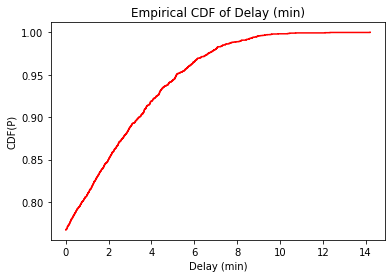

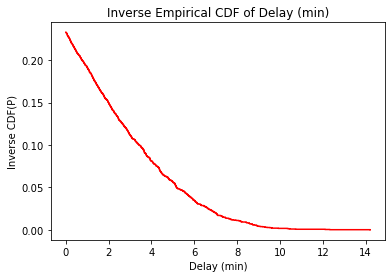

In [7]:
delay_arr = np.array(bd_table['Demand_Current'] - bd_table['Demand_Actual'])
ecdf(delay_arr, 'Delay (min)')
inv_ecdf(delay_arr, 'Delay (min)')

In [8]:
path = r"C:\Users\krishrao\Desktop\Laptop Backup\Krishna\Fall'21\IOE 574\Term Project\IOE574_Project\data_files\LiqFuel_SensAnalysis\\"
ss_table.to_parquet(path+'ss_table_'+refuel+'_'+np.str(n_buses)+'_'+
                    np.str(level_mean)+'_'+np.str(running_consumption)+'_'+
                    np.str(service_consumption)+'.parquet')
bd_table.to_parquet(path+'bd_table_'+refuel+'_'+np.str(n_buses)+'_'+
                    np.str(level_mean)+'_'+np.str(running_consumption)+'_'+
                    np.str(service_consumption)+'.parquet')

___
## Testing Area

#### Testing for route demands

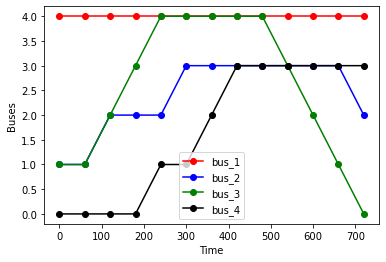

In [9]:
# route demand functions
array_t = np.array(range(0, 12*60+1, 60))

# https://ltp.umich.edu/wp-content/uploads/bursley_baits.pdf
a, b, c, d = 0, 4, 0, 1
plt.plot(array_t, np.ceil(a*np.sin((array_t+c)/d) + b), 
         color='r', label='bus_1', marker='o')

# https://ltp.umich.edu/wp-content/uploads/northwood.pdf
a, b, c, d = 1.5, 1.5, -180, 180
plt.plot(array_t, np.ceil(a*np.sin((array_t+c)/d) + b), 
         color='b', label='bus_2', marker='o')

# https://ltp.umich.edu/wp-content/uploads/diag_diag.pdf
a, b, c, d = 3, 1, -60, 180
plt.plot(array_t, np.ceil(a*np.sin((array_t+c)/d) + b), 
         color='g', label='bus_3', marker='o')

# https://ltp.umich.edu/wp-content/uploads/oxford_shuttle.pdf
a, b, c, d = 2, 1, -320, 180
plt.plot(array_t, np.ceil(a*np.sin((array_t+c)/d) + b), 
         color='black', label='bus_4', marker='o')

plt.xlabel('Time')
plt.ylabel('Buses')
plt.legend()
plt.show()